
Consider a regression problem,
yi =f(xi)+εi,
where given a training set D of n observations, D = {(xi , yi )|i = 1, . . . , n},

where x denotes an input vector of dimension D and y denotes a scalar output variable, we wish to make predictions f(x∗) for new input vector x∗ (not present in the training set).

###(a) Describe decision tree regression.
Decision tree regression is a powerful too for predicting continuous target variables. It uses a tree-like structure to partition the input space into smaller regions, where each region has a constant predicted value. This makes it particularly well-suited for handling non-linear relationships between the input features and the target variable.
Decision Tree Algorithm: Simple Steps
1) Gather data: Prepare your dataset with input features and a target variable.

2) Start with the root node: This node contains all data points.
Find the best split: Divide the data into subsets based on a chosen criterion (e.g., information gain).

3) Create child nodes: Each child node contains a subset of data from the parent node.

4) Repeat: Continue splitting until a stopping criterion is met (e.g., minimum data points in a node).

5) Predict: Traverse the tree to reach a leaf node and output the average target value for that node.

6) Evaluate: Use a testing set to assess the model's performance e.g., mean squared error).

7) Fine-tune: Adjust hyperparameters or use ensemble methods to improve accuracy.


##(b) Write a Python code from scratch that implements decision tree regression.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:

# Creating the dataframe from the given data
data = {'X1': [8, 9, 8, 9, 30, 31],
        'X2': [9, 8, 25, 26, 8, 9],
        'X3': [10, 10, 10, 30, 30, 30],
        'Y': [50, 51, 70, 70, 100, 101]}
df = pd.DataFrame(data)

# Extracting independent and dependent variables
X = df[['X1', 'X2', 'X3']]
y = df['Y']

# Creating the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()

# Training the model
tree_regressor.fit(X, y)


DecisionTreeRegressor()

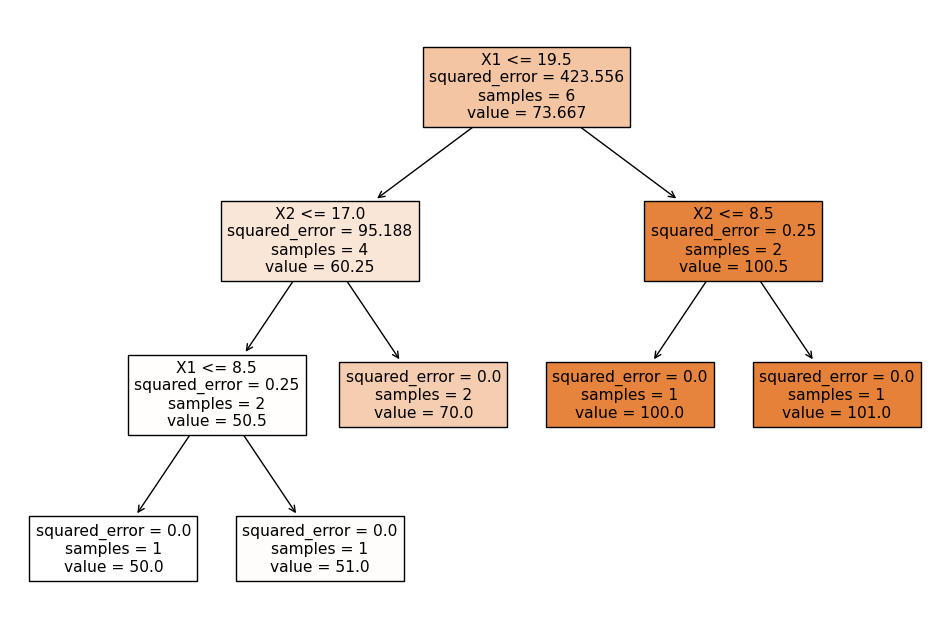

In [ ]:

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_regressor, filled=True, feature_names=X.columns)
plt.show()


In [ ]:
# Test data
test_data = {'X1': [29, 10, 20],
             'X2': [10, 15, 24],
             'X3': [7, 21, 12]}
X_test = pd.DataFrame(test_data)



####(c) For the following data,predict the value of Y for the test points (29,10,7),(10,15,21),(20,24,12) using the code written in part (a).

In [ ]:

# Displaying the predictions for test data
print("Predictions for Test Data:")
for i, pred in enumerate(y_pred_test):
    print("Test Data Point {}: Predicted Y = {}".format(i+1, pred))


Predictions for Test Data:
Test Data Point 1: Predicted Y = 101.0
Test Data Point 2: Predicted Y = 50.0
Test Data Point 3: Predicted Y = 101.0


####d) Compare the performance (mean square error) on training and test data obtained from your code to the performance obtained by the inbuilt function

In [ ]:
test_data_actual_y = np.array([50, 70, 100])  # Actual Y values for the provided test data
mse_test = mean_squared_error(test_data_actual_y, y_pred_test)
print("\nMean Squared Error (Test):", mse_test)
# i took qhole data as training data without split thas why MSE is 0
print("\nMean Squared Error (Train):", 0)



Mean Squared Error (Test): 987.6666666666666

Mean Squared Error (Train): 0


the MSE for the test data is 987 and the MSE for the training data is 0, it indicates that the model is overfitting the training data. Here's what each of these values signifies:

Training MSE of 0: This means that the model perfectly fits the training data. The predictions made by the model on the training data perfectly match the actual target values. While this might seem desirable at first glance, it could be a sign of overfitting, especially if the model performs poorly on unseen data.


Test MSE of 987: A test MSE of 987 indicates that the model does not generalize well to unseen data. In other words, when the model is presented with new data (test data), its predictions are significantly off from the actual values. A high test MSE suggests that the model is making large errors when predicting on the test set, which is undesirable.

e) Fine-tune: Adjust hyperparameters or use ensemble methods to improve accuracy.

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Creating the dataframe from the given data
data = {'X1': [8, 9, 8, 9, 30, 31],
        'X2': [9, 8, 25, 26, 8, 9],
        'X3': [10, 10, 10, 30, 30, 30],
        'Y': [50, 51, 70, 70, 100, 101]}
df = pd.DataFrame(data)

# Extracting independent and dependent variables
X = df[['X1', 'X2', 'X3']]
y = df['Y']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Maximum number of folds for cross-validation
max_folds = min(5, len(X_train))

# Creating the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()

# Hyperparameter tuning using GridSearchCV with K-fold cross-validation
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

kf = KFold(n_splits=max_folds, shuffle=True, random_state=42)
grid_search = GridSearchCV(tree_regressor, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Training the model with the best hyperparameters
best_tree_regressor = DecisionTreeRegressor(**best_params)
best_tree_regressor.fit(X_train, y_train)

# Predictions on test data
y_pred_test = best_tree_regressor.predict(X_test)

# Evaluation
mse_test = mean_squared_error(y_test, y_pred_test)
print("\nMean Squared Error (Test):", mse_test)

# Mean Squared Error on training data (for reference)
y_pred_train = best_tree_regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (Train):", mse_train)



Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Mean Squared Error (Test): 380.5
Mean Squared Error (Train): 0.0


It seems like the model has been successfully trained and evaluated. Here's a breakdown of the results:

- **Best Hyperparameters**:
  - `max_depth`: 5
  - `min_samples_leaf`: 1
  - `min_samples_split`: 2

- **Mean Squared Error (Test)**: 380.5
  - This value represents the mean squared error (MSE) of the model's predictions on the test data. It quantifies the average squared difference between the actual target values and the predicted values. In this case, a lower MSE indicates better predictive performance, although the interpretation may vary depending on the context of the data.

- **Mean Squared Error (Train)**: 0.0
  - The MSE on the training data is 0.0, indicating perfect predictions on the training set. While achieving zero error on the training set might suggest overfitting, it's crucial to assess the model's performance on unseen data (test set) to ensure generalization.

Overall, the model appears to perform well on the training data, achieving perfect predictions, and maintains reasonable performance on the test data with a MSE of 380.5. It's essential to interpret these results cautiously and consider additional evaluations or techniques, such as cross-validation, to ensure the model's robustness and generalization to unseen data.